# **Importing the Dataset from Kaggle**

In [1]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
# Downloading the "Plant Village" dataset from Kaggle
import os
if os.path.exists('/content/fer2013.zip'):
  print("Datset is already present.")
else:
  !kaggle datasets download -d msambare/fer2013

 86% 52.0M/60.3M [00:01<00:00, 29.7MB/s]
100% 60.3M/60.3M [00:01<00:00, 41.6MB/s]


In [9]:
if os.path.exists("/content/train/angry"):
  pass
else:
  from zipfile import ZipFile
  file_path = "/content/fer2013.zip"

  with ZipFile(file_path, 'r') as zip:
    zip.extractall()

  print("Unziped all files")

Unziped all files


In [10]:
Target_classes = os.listdir("/content/train")
print(Target_classes)

['sad', 'neutral', 'fear', 'happy', 'disgust', 'angry', 'surprise']


In [11]:
# Counting the number of elements in each class
BASE_DIR = "/content/train"

for i in Target_classes:
  path = os.path.join(BASE_DIR, i)
  print(i+": "+str(len(os.listdir(path))))

sad: 4830
neutral: 4965
fear: 4097
happy: 7215
disgust: 436
angry: 3995
surprise: 3171


# **Displaying Images**

In [12]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def plot_img(path):
  img = load_img(path)
  plt.imshow(img)
  plt.show()

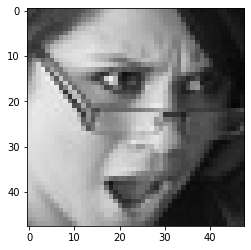

In [13]:
plot_img("/content/train/angry/Training_10882484.jpg")

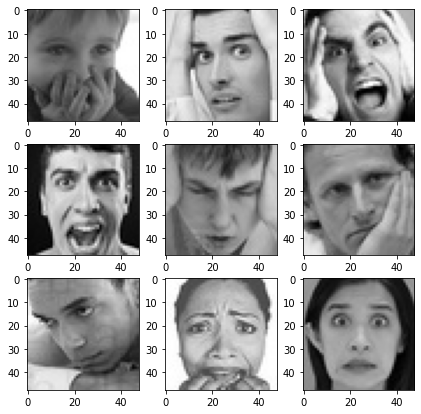

In [14]:
emotion = "fear"

plt.figure(figsize=(7,7))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(BASE_DIR+"/"+emotion+"/"+os.listdir(BASE_DIR+"/"+emotion)[i])
    plt.imshow(img)   
plt.show()

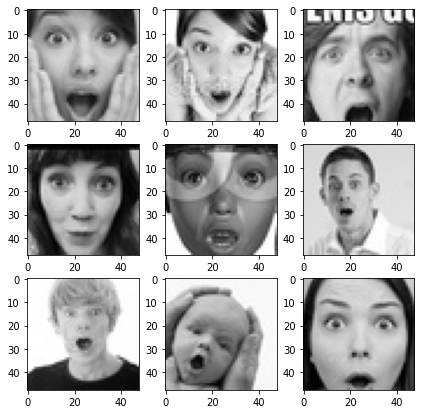

In [15]:
emotion = "surprise"

plt.figure(figsize=(7,7))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(BASE_DIR+"/"+emotion+"/"+os.listdir(BASE_DIR+"/"+emotion)[i])
    plt.imshow(img)   
plt.show()

# **Creating Validation dataset**

In [16]:
img_per_class = 100

# Creating validation directory
if os.path.exists("/content/validation"):
  print("Directory already exisis")
else:
    os.mkdir("validation")

In [22]:
# In case of any error in copying images to validation. Delete the diectory and restart copying
# %rm -rf "/content/validation"

In [17]:
# Creating Class Directories
for i in Target_classes:
  path = "/content/validation"+"/"+i
  if not (os.path.exists(path)):
    os.mkdir(path)
    print(i+" Direcotry Created!!")

sad Direcotry Created!!
neutral Direcotry Created!!
fear Direcotry Created!!
happy Direcotry Created!!
disgust Direcotry Created!!
angry Direcotry Created!!
surprise Direcotry Created!!


In [18]:
import shutil
for i in Target_classes:
  base_path = "/content/test"+"/"+i
  trg_path = "/content/validation"+"/"+i
  if len(os.listdir(trg_path))==0:
    images = os.listdir(base_path)
    for j in range(0, img_per_class):
      src_path = base_path+"/"+images[j]
      shutil.copy2(src_path, trg_path)
    print("Added Images to "+i+" folder")
  

Added Images to sad folder
Added Images to neutral folder
Added Images to fear folder
Added Images to happy folder
Added Images to disgust folder
Added Images to angry folder
Added Images to surprise folder


In [19]:
# Counting the number of elements in each class
for i in Target_classes:
  path = os.path.join("/content/validation", i)
  print(i+": "+str(len(os.listdir(path))))

sad: 100
neutral: 100
fear: 100
happy: 100
disgust: 100
angry: 100
surprise: 100


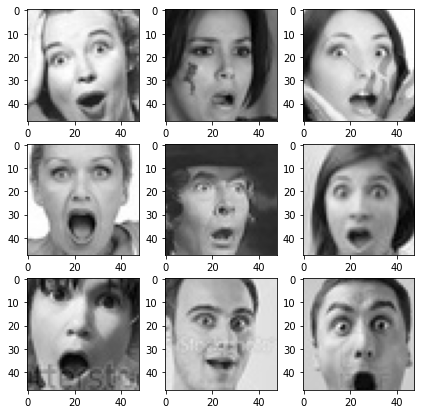

In [20]:
emotion = "surprise"
BASE_DIR = "/content/validation"
plt.figure(figsize=(7,7))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(BASE_DIR+"/"+emotion+"/"+os.listdir(BASE_DIR+"/"+emotion)[i])
    plt.imshow(img)   
plt.show()

# **Preparing Model Training and Validation Dataset**

In [21]:
# NUmber of classes
num_classes = 7

# Target Image Size
rows, column = 48,48

#Defining batch size
batch_size = 64

In [22]:
train_path = "/content/train"
valid_path = "/content/test"

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

valid_datagen = ImageDataGenerator(rescale=1/255)

In [24]:
train_data = train_datagen.flow_from_directory(train_path, 
                                               color_mode='grayscale',
                                               target_size=(48, 48), 
                                               batch_size=batch_size, 
                                               class_mode="categorical", shuffle=True)

valid_data = valid_datagen.flow_from_directory(valid_path, color_mode='grayscale',
                                               target_size=(48, 48),
                                               batch_size=batch_size,
                                               class_mode="categorical", shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


# **Building the Model**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Activation, BatchNormalization

In [26]:
model = Sequential()

# Block - 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

# Block - 2
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# Block - 3
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(num_classes, activation='softmax'))


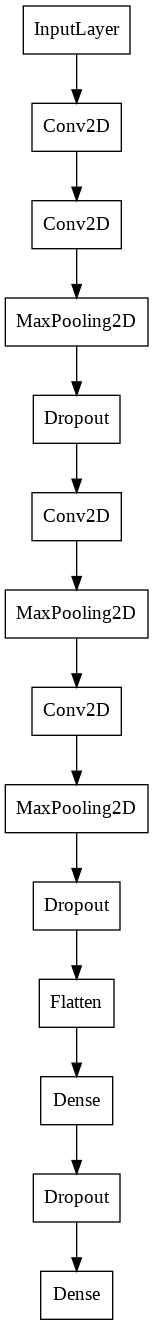

In [27]:
from tensorflow import keras
keras.utils.plot_model(model, "FaceModel.png", show_layer_names=False)

In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# **Model Training**

In [ ]:
hist = model.fit(train_data, 
                 steps_per_epoch= 28709 // 64,
                 epochs = 50,
                 validation_data = valid_data,
                 validation_steps = 7178 // 64)

Epoch 1/50
448/448 [==============================] - 19s 40ms/step - loss: 1.5813 - accuracy: 0.3749 - val_loss: 1.3738 - val_accuracy: 0.4782
Epoch 2/50
448/448 [==============================] - 18s 39ms/step - loss: 1.3491 - accuracy: 0.4806 - val_loss: 1.2384 - val_accuracy: 0.5250
Epoch 3/50
448/448 [==============================] - 18s 39ms/step - loss: 1.2411 - accuracy: 0.5244 - val_loss: 1.1735 - val_accuracy: 0.5477
Epoch 4/50
448/448 [==============================] - 18s 39ms/step - loss: 1.1762 - accuracy: 0.5526 - val_loss: 1.1469 - val_accuracy: 0.5618
Epoch 5/50
448/448 [==============================] - 18s 39ms/step - loss: 1.1191 - accuracy: 0.5750 - val_loss: 1.1241 - val_accuracy: 0.5675
Epoch 6/50
448/448 [==============================] - 17s 39ms/step - loss: 1.0770 - accuracy: 0.5927 - val_loss: 1.1011 - val_accuracy: 0.5790
Epoch 7/50
448/448 [==============================] - 17s 39ms/step - loss: 1.0250 - accuracy: 0.6135 - val_loss: 1.0756 - val_accuracy:

# **Model Accuracy Graph**

In [28]:
import matplotlib.pyplot as plt

def plot_hist(hist):
  plt.plot(hist.history["accuracy"])
  plt.plot(hist.history["val_accuracy"])
  plt.title("Model Accuracy Graph")
  plt.ylabel("Accuracy")
  plt.xlabel("Epochs")
  plt.legend(["Train", "Validation"], loc="upper left")
  plt.show()

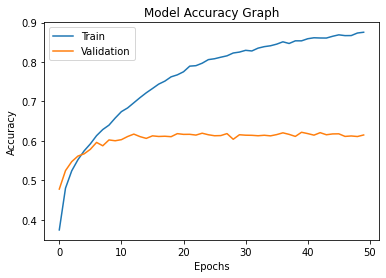

In [ ]:
plot_hist(hist)

In [ ]:
model.save("/content/drive/MyDrive/ML Projects/Facial Expression Detection/Initial_model.h5")

In [29]:
train_data.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [30]:
classes = {0: 'It looks like this person is Angry 😡',
           1: 'Disgust 🤢',
           2: 'This person feels intense fear 😨',
           3: 'This person looks Happy 😃',
           4: 'Neutral 😐',
           5: 'Feeling Sad 😔',
           6: 'Feeling Surprised 😲'}

In [31]:
import numpy as np

def predict_mood(path=None):
  if(path==None):
    path = input("Enter path of the Image: ")
  img = load_img(path, target_size=(48, 48), grayscale=True, color_mode='gratscale')
  img = img_to_array(img)
  img = img/255
  img = np.expand_dims(img, axis=0)
  pred = np.argmax(model.predict(img))
  print("\n")
  print(classes[pred])
  img1 = load_img(path, target_size=(48, 48))
  plt.imshow(img1)
  plt.show()


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '




Feeling Sad 😔


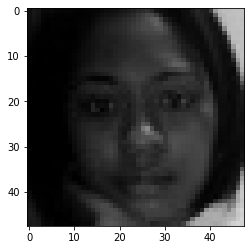

In [32]:
predict_mood('/content/train/sad/Training_10122997.jpg')

Enter path of the Image/content/train/fear/Training_10018621.jpg


This person feels intense fear 😨


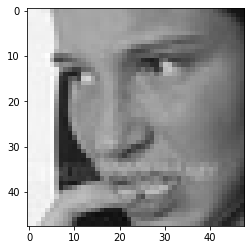

In [ ]:
predict_mood()

Enter path of the Image/content/train/disgust/Training_11050021.jpg


Disgust 🤢


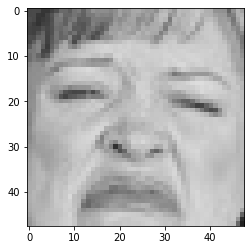

In [ ]:
predict_mood()

Enter path of the Image: /content/train/neutral/Training_10078021.jpg


Neutral 😐


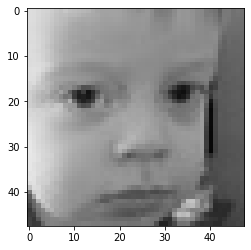

In [ ]:
predict_mood()

Enter path of the Image: /content/train/happy/Training_10109375.jpg


This person looks Happy 😃


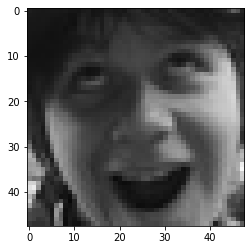

In [ ]:
predict_mood()

Enter path of the Image: /content/train/surprise/Training_10471419.jpg


fFeeling Surprised 😲


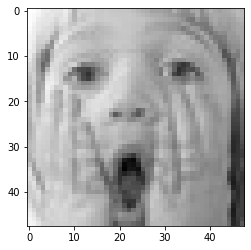

In [ ]:
predict_mood()

# **Loading the Saved Model**

In [33]:
from tensorflow.keras.models import load_model

model = load_model("/content/drive/MyDrive/Ml Projects/Facial Expression Detection/Initial_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         1

In [40]:
import numpy as np

classes = {0: 'It looks like this person is Angry 😡',
           1: 'Disgust 🤢',
           2: 'This person feels intense fear 😨',
           3: 'This person looks Happy 😃',
           4: 'Neutral 😐',
           5: 'Feeling Sad 😔',
           6: 'Feeling Surprised 😲'}

def predict_mood(path=None):
  if(path==None):
    path = input("Enter path of the Image: ")
  img = load_img(path, target_size=(48, 48), color_mode='grayscale')
  img = img_to_array(img)
  img = img/255
  img = np.expand_dims(img, axis=0)
  pred = np.argmax(model.predict(img))
  print("\n")
  print(classes[pred])
  img1 = load_img(path, target_size=(48, 48))
  plt.imshow(img1)
  plt.show()


Enter path of the Image: /content/test/angry/PrivateTest_10131363.jpg


It looks like this person is Angry 😡


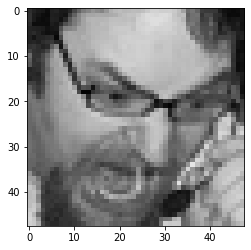

In [42]:
predict_mood()

Enter path of the Image: /content/test/sad/PrivateTest_10455506.jpg


Feeling Sad 😔


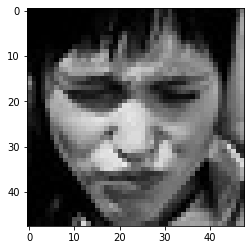

In [41]:
predict_mood()

# **Sugesting the songs according to the Mood**

## Song Albums 

In [35]:
# For angry mood
Angry = ["Eminem - 'The Way I Am'",
         "P!nk - 'So What'",
         "Kelis - 'I Hate You So Much Right Now'",
         "Linkin Park - 'In The End'",
         "Taylor Swift - 'We Are Never Ever Getting Back Together'"
        ]

# Disgust
Disgust = ["New Years Day - 'Disgust Me",
           "Low - 'Point of Disgust",
           "Still Don't Seem To CareTalk In Tongues.",
           "I Hate Everything About YouThree Days Grace."
          ]

# Fear
Fear = ["Shawn Mendes - 'In My Blood'",
        "Ariana Grande - 'Breathin'",
        "Demi Lovato - 'Sober'",
        "Ed Sheeran - 'Save Myself'",
        "Anne-Marie - 'Perfect'"
       ]

# Happy
Happy = ["Dua Lipa - 'Levitating'",
         "Harry Styles - 'Watermelon Sugar'",
         "Justin Bieber - 'Hold On'",
         "Feist - 'I feel It All'",
         "The Vamps - 'All The Lies'",
         "Italo Brothers - 'Inside Out'"
        ]

# Neutral
Neutral = ["Paul Simon - 'Diamonds On the Soles of Her Shoes'",
           "The Police - 'Message in a Bottle'",
           "The Beatles - 'Blackbird'",
           "Trevor Hall - 'Green Mountain State'",
           "Keane - 'Somewhere Only We Know'"
          ]

# Sad
Sad = ["Chord Overstreet - 'Hold On'",
       "Taylor Swift - 'Cowboy Like Me'",
       "Billie Eilish - 'When The Party's Over'",
       "Céline Dion - 'My Heart Will Go On'",
       "Harry Styles - 'From the Dining Table'",
       "Agnes Obel - 'Fuel to Fire'"
      ]

# Surprised
Surprised = ["Ariana Grande - 'One Last Time'",
             "Maroon 5 - 'Sunday Morning",
             "Maggie Rogers - 'Back In My Body'",
             "David Guetta - 'Hey Mama'"
            ]

In [36]:
Moods = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']

# Function to predict the mood
def mood(path):
  img = load_img(path, target_size=(48, 48), color_mode='grayscale')
  img = img_to_array(img)
  img = img/255
  img = np.expand_dims(img, axis=0)
  pred = np.argmax(model.predict(img))
  plt.imshow(load_img(path))
  return pred

# Function to suggest the songs based on Moods
def suggest_songs(img_path=None):
  if(img_path == None):
    img_path = input("Enter Image Path: ")
  moods = [Angry, Disgust, Fear, Happy, Neutral, Sad, Surprised]
  current_mood = mood(img_path)
  print("Mood: ", Moods[current_mood])
  print("\n")
  print("Songs: ")
  # print("\n")
  for i in moods[current_mood]:
    print(i)
    print("\n")


Mood:  Angry


Songs: 
Eminem - 'The Way I Am'


P!nk - 'So What'


Kelis - 'I Hate You So Much Right Now'


Linkin Park - 'In The End'


Taylor Swift - 'We Are Never Ever Getting Back Together'




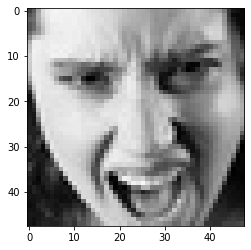

In [43]:
suggest_songs("/content/test/angry/PrivateTest_2775163.jpg")